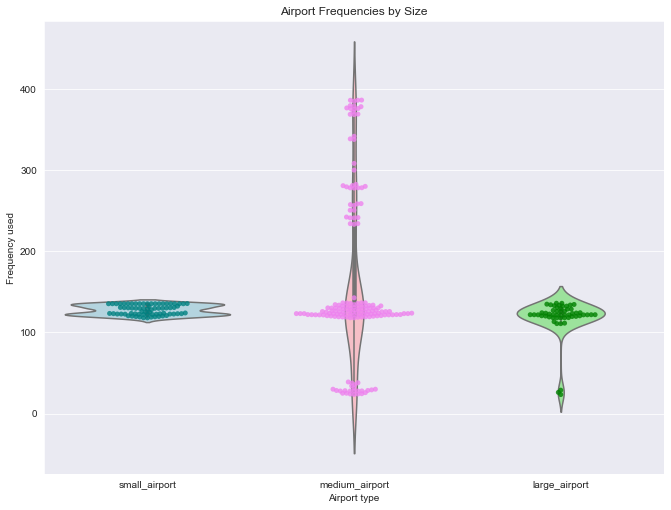

In [1]:
#all essential packages and APIs imported: 
#tkinter for GUI, pandas and numpy for data manipulation, matplotlib and seaborn for visualisations

import tkinter as tk
from tkinter import *
from tkinter import Tk
from tkinter import filedialog as fd
from tkinter.filedialog import askopenfilename
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import csv

 
root = tk.Tk()

class Window:

    def __init__(self, master):

#tkinter window initiated with frame for buttons, and frame for output dialog        
      
            frame1 = Frame(master)
            frame1.pack(side="left")

#buttons created for each of the clients requirements 
#they are ENABLED/DISABLED prompting towards the action required from user at a given moment
#buttons are allocated on a grid
#each button has a command mapped to a corresponding function
            
            self.btn1 = Button(frame1, text="Clean data",state = DISABLED, command=self.cleanData)
            self.btn1.grid(row=10,column=0,columnspan=3)

            self.btn2 = Button(frame1, text="Analyse data", state = DISABLED, command=self.analyseData)
            self.btn2.grid(row=11,column=0,columnspan=3)

            self.btn3 = Button(frame1, text="Small Airport Distribution Graph ", state = DISABLED, command=self.distr)
            self.btn3.grid(row=12,column=0,columnspan=3)

            self.btn4 = Button(frame1, text="Airport Type and Frequency Correlation Graph ", state = DISABLED, command=self.freq)
            self.btn4.grid(row=13,column=0,columnspan=3)
            
            self.btn5 = Button(frame1, text="Load airport data in CSV",state = NORMAL, command=self.load_airports)
            self.btn5.grid(row=5,column=0,columnspan=3)
            
            self.btn6 = Button(frame1, text="Load frequency data in CSV",state = DISABLED, command=self.load_freq)
            self.btn6.grid(row=6,column=0,columnspan=3)
            
            self.btn7 = Button(frame1, text="Load runways data in CSV",state = DISABLED, command=self.load_runways)
            self.btn7.grid(row=7,column=0,columnspan=3)
            
            self.btn8 = Button(frame1, text="Save dataset as JSON",state = DISABLED, command=self.save_json)
            self.btn8.grid(row=8,column=0,columnspan=3)
            
            self.btn9 = Button(frame1, text="Load saved JSON dataset",state = NORMAL, command=self.load_json)
            self.btn9.grid(row=9,column=0,columnspan=3)
            
            

            frame2 = Frame(master)
            frame2.pack(side="left")
            self.text = Text(frame2)
            self.text.pack()

            
#function defined for cleaning the data according with client requirements
#merging 3 loaded datasets into one, removing closed airports, including only UK/GB airports - pandas used
#splitting airport type into 3 required columns and one hot encoded 1 or 0  
#relevant exception handling implemented
#output in tkinter window implemented 
#once code runs successfuly the button becomes disabled, and a button for next required action is enabled

    def cleanData(self):
        
        try:

            airports1 = self.airports.rename(columns={'id':'airport_ref'})
            data1= pd.merge(airports1, self.freq, on='airport_ref', how='inner')
            airport_data = pd.merge(data1, self.runways, on = 'airport_ref', how='inner')

            airport_data = airport_data[airport_data['type_x'].str.contains('closed')==False]
            airport_data = airport_data[airport_data['iso_country'].str.contains('GB')==True]

            airport_types = pd.get_dummies(airport_data.type_x)
            self.airport_data = pd.concat([airport_data, airport_types], axis=1, join="inner")


            global entry_string
            self.text.insert(tk.END, entry_string1)
            self.btn1['state'] = DISABLED
            self.btn8['state'] = NORMAL            

        except UnicodeDecodeError:
            global entry_string
            self.text.insert(tk.END, error_text)
            self.btn1['state'] = DISABLED
            self.btn5['state'] = NORMAL 

        except KeyError:
            global entry_string
            self.text.insert(tk.END, error_text)
            self.btn1['state'] = DISABLED
            self.btn5['state'] = NORMAL             

            
            
#function defined for analysing the data according with client requirements 
#calculated mean, mode and median for uk large airports and frequencies over 100mhz - pandas used
#output in tkinter window implemented 
#relevant exception handling implemented
#once code runs successfuly the button becomes disabled, and a button for next required action is enabled

    def analyseData(self):

        try:

            self.airport_data = self.airport_data.loc[self.airport_data['heliport'] != 1]
            self.airport_analysis = self.airport_data[['name', 'type_x', 'frequency_mhz','small_airport', 'medium_airport','large_airport']]

            #data for this analysis requires us to remove any duplicates
            self.airport_analysis_nodup = self.airport_analysis.drop_duplicates(subset=['name', 'frequency_mhz'], keep=False)


            self.large_airports =  self.airport_analysis_nodup.loc[self.airport_data['large_airport'] != 0]
            self.large_airports_mean = self.large_airports["frequency_mhz"].mean()
            self.large_airports_mode = self.large_airports["frequency_mhz"].mode().values[:]
            self.large_airports_median = self.large_airports["frequency_mhz"].median()

            self.freq_over_100 =  self.airport_analysis_nodup.loc[self.airport_data['frequency_mhz'] > 100.0]
            self.freq_over_100_mean = self.freq_over_100["frequency_mhz"].mean()
            self.freq_over_100_mode = self.freq_over_100["frequency_mhz"].mode().values[:]
            self.freq_over_100_median = self.freq_over_100["frequency_mhz"].median()
            
            #output string with analysis results passed to tkinter output window
            entry_string2 = str('***** STATS FOR LARGE UK AIRPORTS *****' + '\nmean: ' + str(self.large_airports_mean) + '\nmode: ' + str(self.large_airports_mode[0]) + ', ' + str(self.large_airports_mode[1]) + ', ' + str(self.large_airports_mode[2]) + '\nmedian: ' + str(self.large_airports_median)
                    +'\n\n****** STATS FOR FREQUENCIES OVER 100Mhz *****' + '\nmean: ' + str(self.freq_over_100_mean) + '\nmode: ' + str(self.freq_over_100_mode[0]) + '\nmedian: ' + str(self.freq_over_100_median) + '\n')

            global entry_string
            self.text.insert(tk.END, entry_string2)    
            self.btn2['state'] = DISABLED
            self.btn3['state'] = NORMAL
            self.btn4['state'] = NORMAL
            
       
        except UnicodeDecodeError:
            global entry_string
            self.text.insert(tk.END, error_text1)
            self.btn2['state'] = DISABLED
            self.btn9['state'] = NORMAL 

        except KeyError:
            global entry_string
            self.text.insert(tk.END, error_text1)
            self.btn2['state'] = DISABLED
            self.btn9['state'] = NORMAL 

            
#function defined for calling distribution graph funtion and providing output in tkinter window            
    def distr(self):
            global entry_string
            self.text.insert(tk.END, entry_string3)
            self.distr_graph()

            
#function defined to create a distribution graph
#matplotlib histogram used
#once called the graph will pop-up in a separate window thanks to FigureCanvasTkAgg in tkinter
    def distr_graph(self):        
            window=tk.Tk()
            window.title("Frequency Distribution")
            window.geometry("800x600")

            self.small_airports =  self.airport_analysis_nodup.loc[self.airport_data['small_airport'] != 0]
            fig = plt.figure(figsize=(15,10))
            plt.hist(self.small_airports['frequency_mhz'], histtype='bar', color='green', edgecolor="green", bins=self.small_airports['frequency_mhz'].nunique())
            plt.title("Small Airport Frequencies Distribution")
            plt.ylabel("Count")
            plt.xlabel("Frequency used")


            chart = FigureCanvasTkAgg(fig, window)
            chart.get_tk_widget().pack()

            tk.mainloop()


            
#function defined for calling frequency graph funtion and providing output in tkinter window               
    def freq(self):
            global entry_string
            self.text.insert(tk.END, entry_string4)
            self.freq_graph()

            
#function defined to create a frequency graph
#seaborn was used, with a combination of violin plot and swarm plot
#once called the graph will pop-up in a separate window thanks to FigureCanvasTkAgg in tkinter            
    def freq_graph(self): 
            window=tk.Tk()
            window.title("Frequency and Type Correlation")
            window.geometry("800x600")

            self.airport_corr = self.airport_analysis_nodup[['name', 'frequency_mhz','type_x']]
            fig = plt.figure(figsize=(15,15))
            sns.set_palette("RdBu")
            sns.set_style("darkgrid")
            sns.violinplot(x='type_x', y='frequency_mhz', data=self.airport_corr, palette=["lightblue", "lightpink", "lightgreen"])
            sns.swarmplot(x='type_x', y='frequency_mhz', data=self.airport_corr, palette=["teal", "violet", "green"], alpha=0.8)

            plt.title("Airport Frequencies by Size")
            plt.ylabel("Frequency used")
            plt.xlabel("Airport type")

            chart = FigureCanvasTkAgg(fig, window)
            chart.get_tk_widget().pack()
            tk.mainloop()
            
#funtion defined to load a csv with airports
#tkinter open file dialog used
#files for selection limited only to .csv format, and title window indicates the right file name for loading
#output in tkinter window
#relevant buttons get enabled and disabled to prompt user towards next action 
    def load_airports(self):

            self.airports_data = fd.askopenfilename(title = "Select airports.csv file",filetypes = (("CSV Files","*.csv"),))
            self.airports = pd.read_csv(self.airports_data)
            global entry_string
            self.text.insert(tk.END, entry_string5)                                     
            self.btn5['state'] = DISABLED
            self.btn6['state'] = NORMAL
            self.btn9['state'] = DISABLED               

#funtion defined to load a csv with airports_frequencies
#tkinter open file dialog used
#files for selection limited only to .csv format, and title window indicates the right file name for loading
#output in tkinter window
#relevant buttons get enabled and disabled to prompt user towards next action             
    def load_freq(self):

            self.freq_data = askopenfilename(title = "Select airports_frequencies.csv file",filetypes = (("CSV Files","*.csv"),)) 
            self.freq = pd.read_csv(self.freq_data)
            global entry_string
            self.text.insert(tk.END, entry_string6)
            self.btn6['state'] = DISABLED
            self.btn7['state'] = NORMAL              

            
#funtion defined to load a csv with airports_frequencies
#tkinter open file dialog used
#files for selection limited only to .csv format, and title window indicates the right file name for loading
#output in tkinter window
#relevant buttons get enabled and disabled to prompt user towards next action                 
    def load_runways(self):

            self.runways_data = askopenfilename(title = "Select runways.csv file",filetypes = (("CSV Files","*.csv"),)) 
            self.runways = pd.read_csv(self.runways_data)
            global entry_string
            self.text.insert(tk.END, entry_string7)
            self.btn7['state'] = DISABLED
            self.btn1['state'] = NORMAL  

           

    #funtion defined to saved the cleaned data from the pandas dataframe to a JSON file
#output in tkinter window
#relevant buttons get enabled and disabled to prompt user towards next action     
    def save_json(self):    
            
            self.airport_data.to_json("airport_data.json", orient = "records", date_format = "epoch", double_precision = 10, force_ascii = True, date_unit = "ms", default_handler = None)
            global entry_string
            self.text.insert(tk.END, entry_string8)
            self.btn8['state'] = DISABLED
            self.btn2['state'] = NORMAL            
              
                
                
#funtion defined to load a JSON with airport_data file saved earlier
#tkinter open file dialog used
#files for selection limited only to .json format, and title window indicates the right file name for loading
#output in tkinter window
#relevant buttons get enabled and disabled to prompt user towards next action               
    def load_json(self): 
            self.json_data = askopenfilename(title = "Select airport_data.json file",filetypes = (("JSON Files","*.json"),)) 
            self.airport_data = pd.read_json(self.json_data)

            global entry_string
            self.text.insert(tk.END, entry_string9)

            self.btn2['state'] = NORMAL
            self.btn5['state'] = DISABLED
            self.btn6['state'] = DISABLED
            self.btn7['state'] = DISABLED            
            self.btn9['state'] = DISABLED             


#variables for tkinter output window, mapped to each operation the app performs, and mapped to error handling         
entry_string1 = str('Data cleaning completed\n\n')  
entry_string3 = str('Distribution graph generated in a new window\n\n')
entry_string4 = str('Correlation graph generated in a new window\n\n')
entry_string5 = str('Airports file was loaded\n\n')
entry_string6 = str('Airport frequencies file was loaded\n\n')
entry_string7 = str('Runways file was loaded\n\n')
entry_string8 = str('airport_data.json file was saved\n\n')
entry_string9 = str('Airport data JSON file was loaded\n\n')
error_text = str(' !! Wrong CSV files loaded. Try again. !!\n\n')
error_text1 = str('!! Wrong JSON file loaded. Try again. !!\n\n')                 


#main window title assgned and root looped
w = Window(root) 
root.title('Airport Data Analayser and Visualiser App')

root.mainloop()